In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [4]:
df = df.drop(['Unnamed: 0',"CRSArrTime","CRSDepTime"],axis=1)
df.shape

(1936758, 27)

# Sample data

In [5]:
nanDf = df[df['AirTime'].isnull()]
nanDf.shape

(8387, 27)

In [6]:
nonNanDf = df.drop(df.index[list(nanDf.index)])
nonNanDf.shape

(1928371, 27)

In [7]:
bins = np.array([0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500])
Depbins = np.digitize(nonNanDf.DepDelay,bins,right=False)
nonNanDf['depbins'] = Depbins

In [8]:
nonNanDf.depbins.value_counts()

1     1729238
2      160244
3       28985
4        6631
5        1768
6         583
7         274
8         192
9         163
10        110
11         76
12         56
13         24
14         14
16          5
15          4
25          2
20          1
18          1
Name: depbins, dtype: int64

In [9]:
data = nonNanDf.groupby('depbins',group_keys=False).apply(lambda x:x.sample(min(len(x),1000000)))
data.shape

(1199133, 28)

In [10]:
data.depbins.value_counts()

1     1000000
2      160244
3       28985
4        6631
5        1768
6         583
7         274
8         192
9         163
10        110
11         76
12         56
13         24
14         14
16          5
15          4
25          2
20          1
18          1
Name: depbins, dtype: int64

In [11]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,depbins
1256743,2008,7,26,6,1750.0,1919.0,CO,1421,N14325,209.0,...,18.0,0,N,0,35.0,0.0,14.0,0.0,0.0,1
843377,2008,5,26,1,1757.0,1946.0,9E,5699,84959E,109.0,...,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
1052965,2008,6,25,3,2112.0,2313.0,AA,1912,N3ATAA,121.0,...,13.0,0,N,0,22.0,0.0,1.0,0.0,0.0,1
599481,2008,4,29,2,1939.0,2057.0,WN,3681,N662SW,78.0,...,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
1483240,2008,9,15,1,1202.0,1452.0,EV,4632,N883AS,110.0,...,10.0,0,N,0,82.0,0.0,8.0,0.0,0.0,1


In [12]:
data.shape

(1199133, 28)

In [13]:
del data['depbins']

In [14]:
data = data.append(nanDf)

In [15]:
data = data.reset_index(drop=True)
data.shape

(1207520, 27)

In [16]:
data = data.reset_index(drop=True)

In [17]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,7,26,6,1750.0,1919.0,CO,1421,N14325,209.0,...,16.0,18.0,0,N,0,35.0,0.0,14.0,0.0,0.0
1,2008,5,26,1,1757.0,1946.0,9E,5699,84959E,109.0,...,11.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,6,25,3,2112.0,2313.0,AA,1912,N3ATAA,121.0,...,5.0,13.0,0,N,0,22.0,0.0,1.0,0.0,0.0
3,2008,4,29,2,1939.0,2057.0,WN,3681,N662SW,78.0,...,4.0,15.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,9,15,1,1202.0,1452.0,EV,4632,N883AS,110.0,...,15.0,10.0,0,N,0,82.0,0.0,8.0,0.0,0.0


# Data Visualization

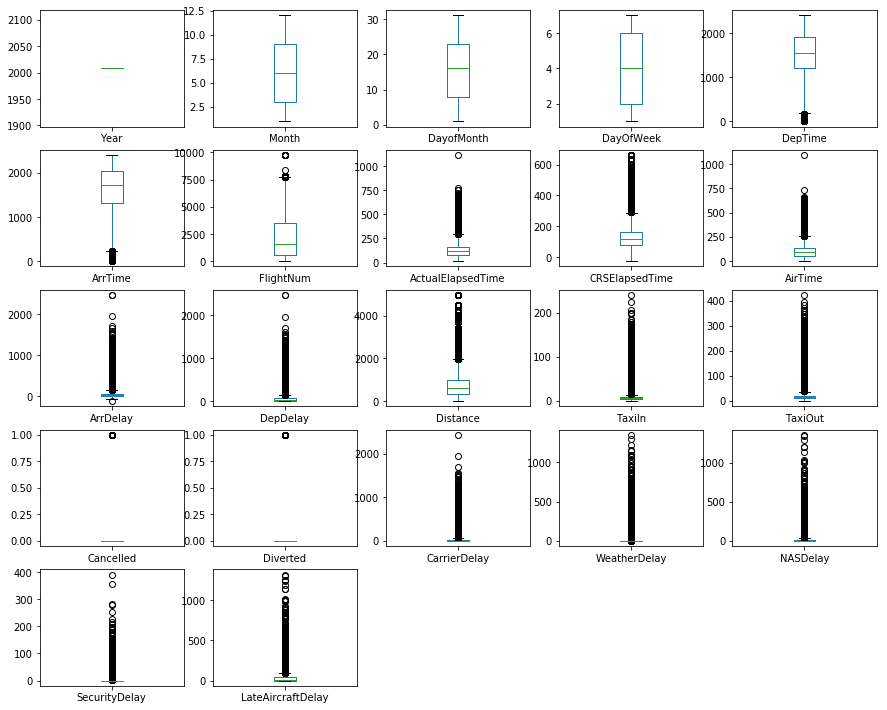

In [18]:
data.plot(kind='box',figsize=(15,15),layout=(6,5),subplots=True)
plt.show()

In [19]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
ArrTime              float64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [20]:
col = data.columns

In [21]:
for i in col:
    print(i + " : ",data[i].unique()) 
    print("\n")

Year :  [2008]


Month :  [ 7  5  6  4  9  2 12  8 11 10  3  1]


DayofMonth :  [26 25 29 15  1 13 22 30 27  3 14 23 21 10 28  5  9  6 16 17 19  2 18 20
  4 31  8 24  7 11 12]


DayOfWeek :  [6 1 3 2 4 5 7]


DepTime :  [1750. 1757. 2112. ...  413.  429.  454.]


ArrTime :  [1919. 1946. 2313. ...  412.  329.   nan]


UniqueCarrier :  ['CO' '9E' 'AA' 'WN' 'EV' 'F9' 'DL' 'UA' 'NW' 'B6' 'US' 'FL' 'YV' 'MQ'
 'OO' 'XE' 'AS' 'OH' 'AQ' 'HA']


FlightNum :  [1421 5699 1912 ... 7487 6899 9742]


TailNum :  ['N14325' '84959E' 'N3ATAA' ... '9169E' 'N171DN' '9149E']


ActualElapsedTime :  [ 209.  109.  121.   78.  110.  101.  369.  156.  236.  120.  154.  214.
  229.  139.  103.  172.   94.  105.   70.   55.   93.   87.  127.  147.
  116.  130.  186.  261.  119.  182.  211.  168.  237.   80.  134.   64.
   89.  108.   40.  122.   90.   60.   84.   62.  340.  141.  493.  138.
   63.  426.  244.   43.  125.  143.   73.   67.   75.  368.  251.  107.
  200.  140.  149.  137.  148.  150.  102.  164.  1

Dest :  ['DEN' 'MSP' 'RDU' 'LAX' 'ATL' 'MCI' 'TPA' 'SRQ' 'AUS' 'ORD' 'DCA' 'ABQ'
 'PHL' 'PIT' 'CLE' 'JFK' 'DFW' 'TUL' 'AVP' 'BGR' 'IND' 'COS' 'SAT' 'STX'
 'LGB' 'DTW' 'EWR' 'SLC' 'SAN' 'BWI' 'JNU' 'SFO' 'BOS' 'MCO' 'MSO' 'CRP'
 'BHM' 'TVC' 'LAS' 'MSN' 'ELP' 'IAH' 'PHX' 'ROC' 'MIA' 'FLL' 'STL' 'SMF'
 'BTR' 'FAR' 'JAC' 'SGF' 'PVD' 'MDW' 'CLT' 'DAL' 'HPN' 'PBI' 'BNA' 'GTF'
 'OMA' 'SJU' 'LIT' 'ONT' 'LGA' 'IAD' 'CPR' 'FAY' 'LRD' 'CVG' 'MKE' 'OKC'
 'PDX' 'GRB' 'MEM' 'FAT' 'MHT' 'SEA' 'SJC' 'HNL' 'BUF' 'SPS' 'EUG' 'BUR'
 'IDA' 'OAK' 'LEX' 'XNA' 'MYR' 'BDL' 'RNO' 'ICT' 'MOB' 'HOU' 'MBS' 'CMH'
 'HRL' 'SBA' 'ACT' 'TLH' 'MSY' 'RST' 'FSD' 'BOI' 'SNA' 'FNT' 'ABE' 'ORF'
 'ANC' 'DAY' 'RIC' 'MLB' 'GRR' 'ATW' 'BMI' 'CID' 'SDF' 'VPS' 'CAK' 'STT'
 'SYR' 'RSW' 'FWA' 'FSM' 'GEG' 'BTV' 'HDN' 'JAN' 'PWM' 'MLI' 'MAF' 'PNS'
 'DHN' 'TUS' 'JAX' 'CHS' 'DAB' 'MGM' 'GSP' 'ALB' 'PSP' 'GRK' 'GSO' 'ISP'
 'EVV' 'BFL' 'CMI' 'AMA' 'WRG' 'SAV' 'LBB' 'BZN' 'MRY' 'PFN' 'KOA' 'RDM'
 'TRI' 'EGE' 'SBP' 'ITO' 'DSM' 'OGG' 'GGG' 

 1.225e+03 8.340e+02 1.148e+03 1.352e+03 1.297e+03]


NASDelay :  [1.400e+01       nan 1.000e+00 8.000e+00 1.000e+01 0.000e+00 2.400e+01
 4.800e+01 1.600e+01 2.000e+00 5.000e+00 1.900e+01 5.300e+01 3.000e+01
 6.000e+00 9.000e+00 1.500e+01 3.000e+00 7.000e+00 1.300e+01 6.100e+01
 4.600e+01 2.500e+01 1.200e+01 1.700e+01 1.800e+01 3.900e+01 3.100e+01
 2.300e+01 2.200e+01 3.400e+01 2.600e+01 5.500e+01 7.700e+01 3.500e+01
 4.000e+01 4.300e+01 2.100e+01 4.000e+00 2.900e+01 3.200e+01 3.800e+01
 3.600e+01 7.900e+01 2.000e+01 5.600e+01 7.800e+01 1.170e+02 2.700e+01
 9.400e+01 4.700e+01 6.200e+01 1.100e+01 8.900e+01 8.200e+01 1.380e+02
 6.400e+01 4.900e+01 4.200e+01 2.800e+01 3.300e+01 8.700e+01 9.200e+01
 1.020e+02 1.160e+02 4.500e+01 5.000e+01 3.700e+01 7.600e+01 7.300e+01
 7.200e+01 9.800e+01 9.600e+01 5.900e+01 5.200e+01 4.400e+01 1.750e+02
 8.300e+01 4.100e+01 6.700e+01 5.800e+01 1.460e+02 6.500e+01 1.010e+02
 6.800e+01 8.600e+01 6.300e+01 7.000e+01 1.390e+02 6.600e+01 9.100e+01
 9.300e+01 

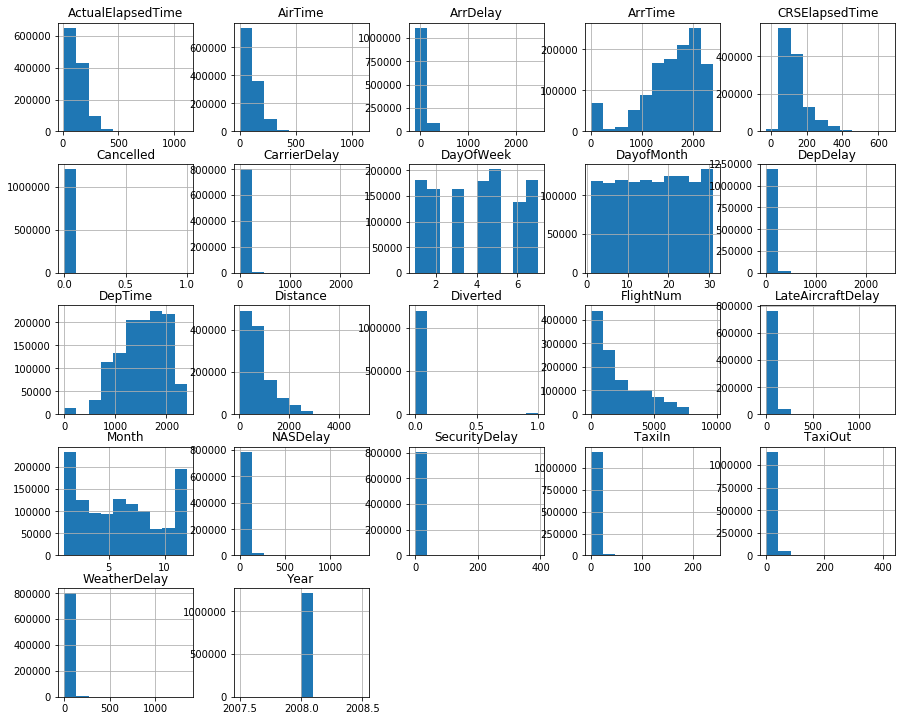

In [22]:
data.hist(figsize=(15,15),layout=(6,5))
plt.show()

In [23]:
# has only one value in the table ie "2008"
del data['Year']

In [24]:
data.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                7110
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         402031
WeatherDelay         402031
NASDelay             402031
SecurityDelay        402031
LateAircraftDelay    402031
dtype: int64

In [25]:
(data[data.columns[1:]].corr()['ArrTime'][:-1])*100

DayofMonth             0.060136
DayOfWeek              0.925728
DepTime               41.841250
ArrTime              100.000000
FlightNum             -0.578130
ActualElapsedTime     -1.989987
CRSElapsedTime        -2.093650
AirTime               -2.413955
ArrDelay              -7.032158
DepDelay              -7.457988
Distance              -3.541967
TaxiIn                 4.407976
TaxiOut               -0.163976
Cancelled                   NaN
Diverted              -0.842172
CarrierDelay          -8.356946
WeatherDelay          -3.315353
NASDelay               3.965647
SecurityDelay         -0.578322
Name: ArrTime, dtype: float64

In [79]:
df = data[(data['Diverted'] == 0) & (data['Cancelled'] == 0)]
df.shape

(1199133, 26)

In [80]:
df.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
ArrTime                   0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         393644
WeatherDelay         393644
NASDelay             393644
SecurityDelay        393644
LateAircraftDelay    393644
dtype: int64

# Remove NaN values

In [81]:
df["SecurityDelay"] = df["SecurityDelay"].fillna(df["SecurityDelay"].mean())
df["NASDelay"] = df["NASDelay"].fillna(df["NASDelay"].mean())
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(df['LateAircraftDelay'].mean())

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [82]:
Carrmean = dict(df.groupby('UniqueCarrier')['CarrierDelay'].mean())
df['Carrmean'] = df['UniqueCarrier'].apply(lambda x:Carrmean[x])
df['CarrierDelay'].fillna(df['Carrmean'],inplace=True)
del df['Carrmean']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Amit Desai\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [83]:
Weamean = dict(df.groupby('Month')['WeatherDelay'].mean())
df['Weamean'] = df['Month'].apply(lambda x:Weamean[x])
df['WeatherDelay'].fillna(df['Weamean'],inplace=True)
del df['Weamean']

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
ind = df[df['TailNum'].isnull() == True].index
df = df.drop(index = ind)

In [85]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [86]:
df = df.reset_index(drop=True)

# Outlier

In [87]:
df =  df.drop(['Cancelled','CancellationCode','Diverted'],axis=1)

In [88]:
df['Month'] = df['Month'].astype('object')
df['DayofMonth'] = df['DayofMonth'].astype('object')
df['DayOfWeek'] = df['DayOfWeek'].astype('object')
df['FlightNum'] = df['FlightNum'].astype('object')
df['SecurityDelay'] = df['SecurityDelay'].astype('object')

In [89]:
num = df.select_dtypes(include=['float64'])
cat = df.select_dtypes(include=['object'])

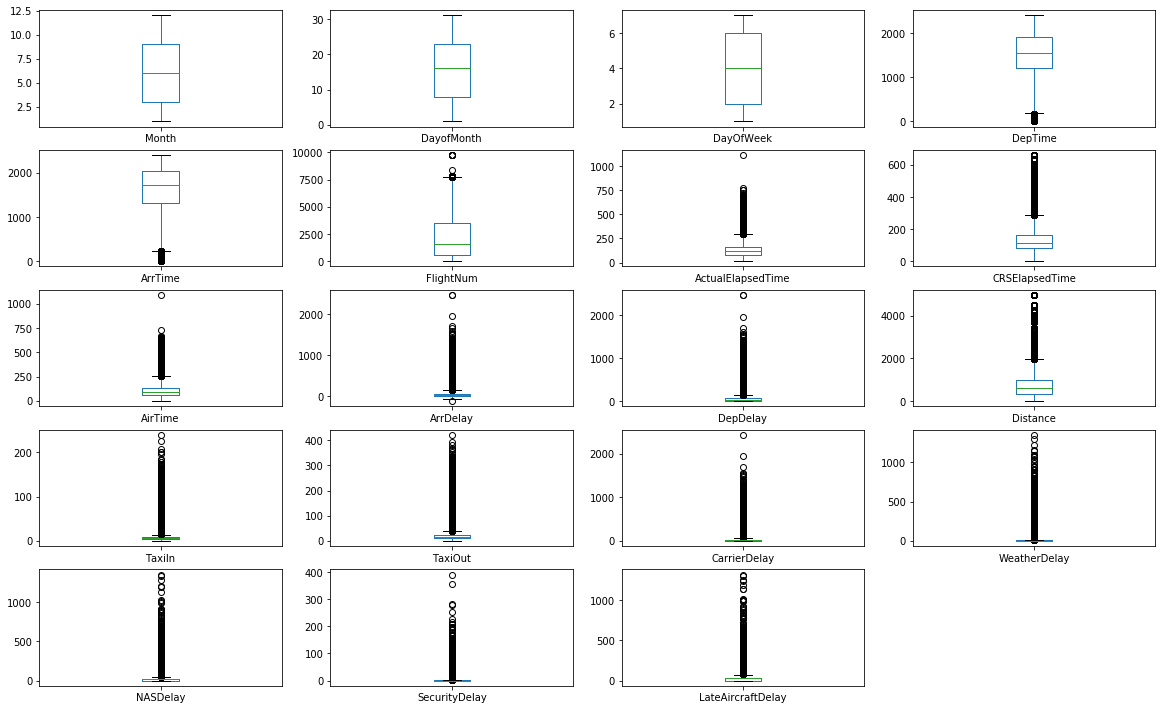

In [90]:
df.plot(kind='box',subplots=True,figsize=(20,15),layout=(6,4))
plt.show()

In [91]:
#num = num.drop('ArrDelay',axis=1)

In [92]:
q3 = num.quantile(0.99)
q1 = num.quantile(0.01)
iqr= q3-q1
high = q3+0*iqr
low = q1-0*iqr

In [93]:
indexes= df.index[((num>high)|(num<low)).any(1)].to_list()
len(indexes)

153072

In [94]:
df = df.drop(index=indexes)
df = df.reset_index(drop=True)
df.shape

(1046058, 23)

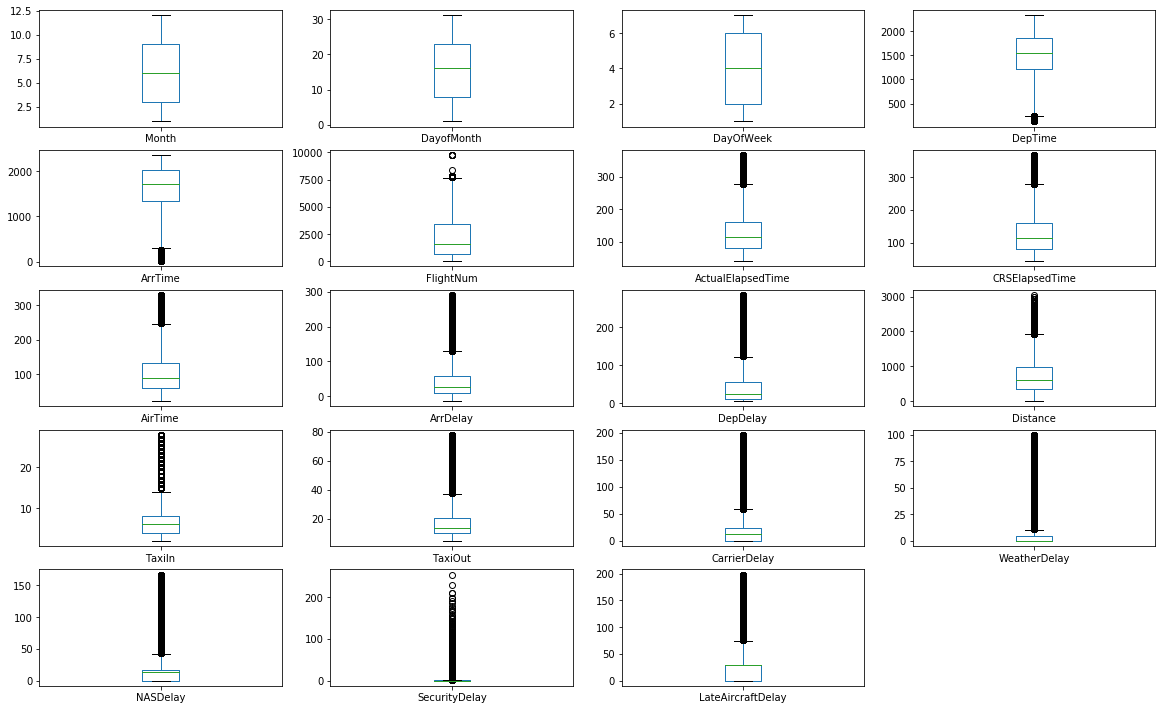

In [95]:
df.plot(kind='box',subplots=True,figsize=(20,15),layout=(6,4))
plt.show()

In [96]:
num = df.select_dtypes(include=['float64'])
cat = df.select_dtypes(include=['object'])

In [97]:
y = num['ArrDelay']
num = num.drop('ArrDelay',axis=1)

In [98]:
scale = MinMaxScaler()
num = pd.DataFrame(scale.fit_transform(num),columns=num.columns)
num.shape

(1046058, 12)

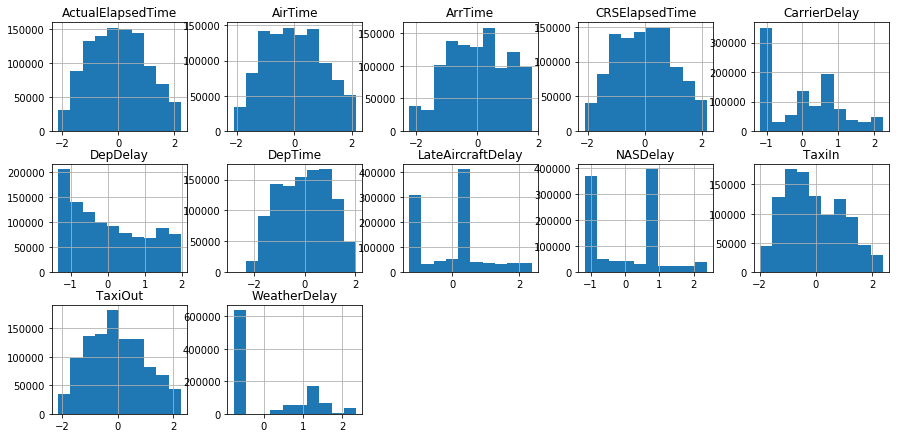

In [99]:
from sklearn.preprocessing import power_transform
num = pd.DataFrame(power_transform(num,method='yeo-johnson'),columns=num.columns)
num.hist(figsize=(15,15),layout=(6,5))
plt.show()

In [100]:
le_TailNum = LabelEncoder()
cat['TailNum'] = le_TailNum.fit_transform(cat.TailNum)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
ohe_UniqueCarrier = OneHotEncoder(handle_unknown='ignore')
ohe_Origin = OneHotEncoder(handle_unknown='ignore')
ohe_Dest = OneHotEncoder(handle_unknown='ignore')

In [102]:
Xs = ohe_UniqueCarrier.fit_transform(cat.UniqueCarrier.values.reshape(-1,1)).toarray()
Xot = ohe_Origin.fit_transform(cat.Origin.values.reshape(-1,1)).toarray()
Xa = ohe_Dest.fit_transform(cat.Dest.values.reshape(-1,1)).toarray()

In [103]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA(n_components=3)
dfOneHot = pd.DataFrame(Xs, columns = ["UniqueCarrier_"+str(int(i)) for i in range(Xs.shape[1])])
principalComponents = pca.fit_transform(dfOneHot)
principalDf = pd.DataFrame(data = principalComponents, columns = ['UniqueCarrier_1','UniqueCarrier_2','UniqueCarrier_3'])
cat = pd.concat([cat, principalDf], axis=1)

In [105]:
pca = PCA(n_components=3)
dfOneHot = pd.DataFrame(Xot, columns = ["Origin_"+str(int(i)) for i in range(Xot.shape[1])])
principalComponents = pca.fit_transform(dfOneHot)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Origin_1','Origin_2','Origin_3'])
cat = pd.concat([cat, principalDf], axis=1)

In [106]:
pca = PCA(n_components=3)
dfOneHot = pd.DataFrame(Xa, columns = ["Dest_"+str(int(i)) for i in range(Xa.shape[1])])
principalComponents = pca.fit_transform(dfOneHot)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Dest_1','Dest_2','Dest_3'])
cat = pd.concat([cat, principalDf], axis=1)

In [107]:
cat = cat.drop(['Origin', 'Dest'], axis=1)
del cat['UniqueCarrier']

In [108]:
cat = cat.reset_index(drop=True)
num = num.reset_index(drop=True)
df_final = pd.concat([num,cat],axis=1)

In [109]:
df_final.columns

Index(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'LateAircraftDelay', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightNum', 'TailNum', 'SecurityDelay', 'UniqueCarrier_1',
       'UniqueCarrier_2', 'UniqueCarrier_3', 'Origin_1', 'Origin_2',
       'Origin_3', 'Dest_1', 'Dest_2', 'Dest_3'],
      dtype='object')

In [110]:
df_final.shape

(1046058, 27)

In [111]:
data_y = y
data_x = df_final

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=20)

# regr = linear_model.LinearRegression()
regr = linear_model.Ridge()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 279.50
Variance score: 0.86


In [112]:
y_pred_train = regr.predict(X_train)
print("Mean squared error: %.2f"% mean_squared_error(y_train, y_pred_train))
print('Variance score: %.2f' % r2_score(y_train, y_pred_train))

Mean squared error: 277.20
Variance score: 0.86


In [113]:
df_final.corr()

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,...,TailNum,UniqueCarrier_1,UniqueCarrier_2,UniqueCarrier_3,Origin_1,Origin_2,Origin_3,Dest_1,Dest_2,Dest_3
DepTime,1.000000,0.664178,-0.057146,-0.044866,-0.058978,0.240672,-0.031496,-0.003056,-0.133769,-0.111526,...,-0.004022,5.390001e-02,2.544846e-02,-1.794866e-02,2.489994e-02,4.188527e-02,1.360672e-02,9.739576e-03,-4.774371e-02,-3.659680e-02
ArrTime,0.664178,1.000000,0.030092,0.037346,0.026485,0.113870,0.033239,0.015741,-0.118338,-0.064093,...,-0.007951,2.695554e-02,2.959088e-02,-2.017733e-02,1.000807e-02,6.468794e-03,-1.231284e-05,-5.026975e-03,-1.093044e-02,-1.119454e-02
ActualElapsedTime,-0.057146,0.030092,1.000000,0.967817,0.973221,0.018035,0.235415,0.302154,0.000720,-0.029884,...,-0.068852,-2.001350e-01,1.569146e-01,-1.972656e-01,-1.405680e-02,-3.505217e-02,-1.360116e-02,2.322664e-02,-1.284688e-02,6.758125e-03
CRSElapsedTime,-0.044866,0.037346,0.967817,1.000000,0.977377,0.015142,0.185838,0.177107,0.045600,0.026427,...,-0.078303,-1.769178e-01,1.619962e-01,-2.120692e-01,-1.204226e-02,-4.250947e-02,-1.714203e-02,2.646038e-02,-2.609156e-02,3.546195e-03
AirTime,-0.058978,0.026485,0.973221,0.977377,1.000000,-0.003870,0.155152,0.116526,0.019997,0.004922,...,-0.075780,-1.224959e-01,1.754792e-01,-2.055980e-01,-2.232415e-02,-6.330760e-02,-1.501243e-02,2.158077e-02,-3.668765e-02,4.819520e-03
DepDelay,0.240672,0.113870,0.018035,0.015142,-0.003870,1.000000,0.053973,0.082616,-0.095076,-0.503742,...,-0.014171,-9.413169e-02,1.216387e-02,-2.631636e-02,-4.815176e-02,4.074727e-02,5.255302e-03,5.299556e-02,5.305838e-02,7.071677e-03
TaxiIn,-0.031496,0.033239,0.235415,0.185838,0.155152,0.053973,1.000000,0.111935,-0.067065,-0.082359,...,0.004815,-2.688724e-01,3.242066e-02,-1.944072e-02,1.072678e-02,-6.975596e-02,-6.991925e-02,-8.487797e-02,2.234906e-01,1.327893e-01
TaxiOut,-0.003056,0.015741,0.302154,0.177107,0.116526,0.082616,0.111935,1.000000,-0.040249,-0.142996,...,0.012307,-4.054758e-01,-4.675134e-02,-3.424820e-02,4.939462e-02,1.668535e-01,5.770274e-02,4.657476e-02,2.917163e-02,-3.711483e-02
CarrierDelay,-0.133769,-0.118338,0.000720,0.045600,0.019997,-0.095076,-0.067065,-0.040249,1.000000,0.168083,...,0.018246,-1.305490e-01,1.658628e-02,-1.317537e-02,3.296045e-02,1.993726e-02,7.480207e-02,-5.096218e-02,-4.281608e-02,-5.033761e-03
WeatherDelay,-0.111526,-0.064093,-0.029884,0.026427,0.004922,-0.503742,-0.082359,-0.142996,0.168083,1.000000,...,0.001088,6.804619e-02,7.625319e-03,1.812715e-02,4.490925e-03,-6.928652e-03,7.391062e-03,-2.943136e-02,-3.744183e-02,2.250337e-03


In [114]:
X_train.head()

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,...,SecurityDelay,UniqueCarrier_1,UniqueCarrier_2,UniqueCarrier_3,Origin_1,Origin_2,Origin_3,Dest_1,Dest_2,Dest_3
181479,-0.938660,-0.943581,-1.038877,-0.872096,-0.828372,0.668289,-0.262896,-1.057351,-1.178713,-0.766403,...,0,0.822772,0.044519,0.003189,-0.012769,-0.102254,-0.101318,-0.001263,-0.057640,-0.022274
669365,-1.314857,-1.245747,-1.581965,-1.330641,-1.350061,-1.342107,-0.262896,-1.297208,0.535154,0.439942,...,0.0887908,-0.237513,-0.257882,0.752470,-0.637408,0.683235,0.118456,-0.001191,-0.054050,-0.020266
1021224,-0.036849,-0.004942,0.867886,0.652654,0.748895,1.779403,-0.262896,1.450097,2.193371,-0.766403,...,0,-0.234746,-0.242741,-0.654977,-0.010158,-0.078305,-0.067481,0.719060,0.620357,0.035506
946225,1.214277,1.124169,-0.813133,-1.866739,-1.976276,1.688456,1.810510,1.763971,-1.178713,-0.766403,...,0,-0.167150,-0.075929,-0.010941,-0.007879,-0.059164,-0.046560,-0.001526,-0.073371,-0.031446
495594,-0.249607,-0.402068,-1.479255,-1.499942,-1.495853,-0.144689,0.127089,-0.103181,-1.178713,-0.766403,...,0,-0.203022,-0.136132,-0.024924,0.768533,0.530764,0.109568,-0.001220,-0.055514,-0.021070


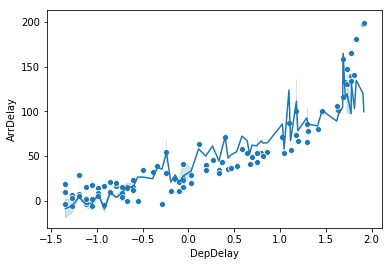

In [115]:
import seaborn as sns
sns.lineplot(X_train.iloc[:100,5],y_pred_train[:100])
sns.scatterplot(X_train.iloc[:100,5],y_train[:100])

In [116]:
regr.coef_,regr.intercept_

(array([ 1.34375059e+00, -1.42027989e+00,  3.24928124e+01, -5.15436112e+01,
         1.83125666e+01,  3.95624696e+01,  1.74442844e+00,  3.91117645e+00,
         4.48671719e+00, -7.13047734e-01,  5.12303967e+00,  5.59436629e+00,
         1.59375410e-02,  8.23295056e-03,  2.07136649e-02,  1.95467380e-04,
        -2.05770317e-05,  2.88223348e-01,  1.01144459e+00, -3.20909310e-01,
        -1.78504228e+00,  8.01892769e-02,  1.19538291e-01, -4.92867012e-01,
        -1.36578608e-01,  1.99443923e-01,  3.44781248e-01]), 39.76743861917154)

In [117]:
residuals = []
for i,j in zip(df_final.iterrows(),y):
    residuals.append(j-(regr.coef_.dot(i[1])+regr.intercept_))
residuals

[-11.53612768428303,
 -5.072896716840759,
 3.058991081012973,
 -4.407856140874237,
 -13.461057808267498,
 4.870419668198668,
 3.45087985060119,
 8.153211076314818,
 -8.802088687383637,
 -30.794959239976265,
 -2.4448399773624203,
 -13.443984121026038,
 -16.535841746019656,
 -10.64670228108055,
 18.473199839764092,
 11.897843367226699,
 0.19266082355673575,
 -1.3213085502533097,
 -26.62113655928698,
 4.569699005449884,
 6.224966111489493,
 -18.94261134438142,
 11.02905062723439,
 -22.434441341206792,
 -17.34649068670184,
 -15.790148303002326,
 -6.600309252971723,
 14.094955023424028,
 -8.038064701876369,
 -15.122717180384484,
 2.9067794658068635,
 1.4682074841631696,
 -17.37662348169855,
 14.05793869191789,
 6.054203286291958,
 -17.69731983405218,
 -19.30989024484137,
 3.8816113332053774,
 2.2643758252633575,
 14.083295426310123,
 0.28318300821800335,
 0.0078028581715372525,
 6.274277353314687,
 1.7844179682066112,
 -8.099406966971848,
 -13.216604429825523,
 -16.911223025099407,
 -5.1542

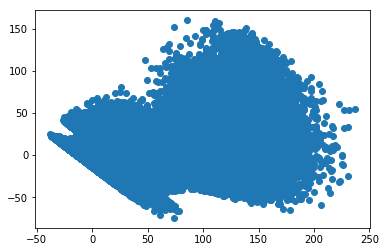

In [118]:
y_pred_whole = regr.predict(df_final)
plt.scatter(y_pred_whole,residuals)

In [119]:
y.head()

0    49.0
1    -3.0
2    23.0
3    12.0
4    90.0
Name: ArrDelay, dtype: float64

In [79]:
from yellowbrick.regressor import PredictionError
viz =PredictionError(regr)
viz.score(X_test,y_test)
viz.poof()

ModuleNotFoundError: No module named 'yellowbrick'

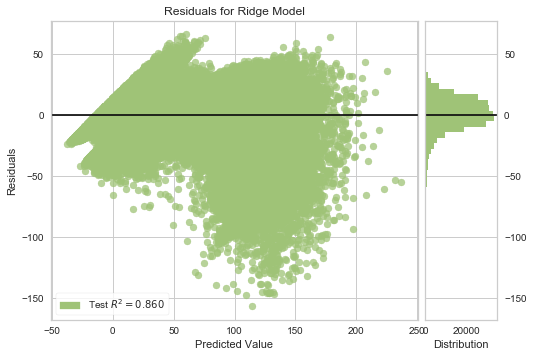

In [69]:
from yellowbrick.regressor import ResidualsPlot
res = ResidualsPlot(regr)
res.score(X_test,y_test)
res.poof()

In [120]:
data_whole = pd.read_csv("DelayedFlights.csv")
data_test_unk = data_whole[~data_whole['ArrDelay'].isin(y)]
data_test_unk.shape

(39438, 30)

In [121]:
# data_test_unk = data_test_unk.sample(10000)
data_test_unk = data_test_unk[((data_test_unk['Diverted']==0)&(data_test_unk['Cancelled']==0))]
data_test_unk.isnull().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                  0
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  1
ActualElapsedTime        0
CRSElapsedTime           0
AirTime                  0
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         18924
WeatherDelay         18924
NASDelay             18924
SecurityDelay        18924
LateAircraftDelay    18924
dtype: int64

In [122]:
data_test_unk["SecurityDelay"] = data_test_unk["SecurityDelay"].fillna(data_test_unk["SecurityDelay"].mean())
data_test_unk["NASDelay"] = data_test_unk["NASDelay"].fillna(data_test_unk["NASDelay"].mean())
data_test_unk['LateAircraftDelay'] = data_test_unk['LateAircraftDelay'].fillna(data_test_unk['LateAircraftDelay'].mean())

Carrmean = dict(data_test_unk.groupby('UniqueCarrier')['CarrierDelay'].mean())
data_test_unk['Carrmean'] = data_test_unk['UniqueCarrier'].apply(lambda x:Carrmean[x])
data_test_unk['CarrierDelay'].fillna(data_test_unk['Carrmean'],inplace=True)
del data_test_unk['Carrmean']

Weamean = dict(data_test_unk.groupby('Month')['WeatherDelay'].mean())
data_test_unk['Weamean'] = data_test_unk['Month'].apply(lambda x:Weamean[x])
data_test_unk['WeatherDelay'].fillna(data_test_unk['Weamean'],inplace=True)
del data_test_unk['Weamean']

ind = data_test_unk[data_test_unk['TailNum'].isnull() == True].index
data_test_unk = data_test_unk.drop(index = ind)
data_test_unk.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [123]:
ind = data_test_unk[data_test_unk['CarrierDelay'].isnull() == True].index
data_test_unk = data_test_unk.drop(index = ind)
data_test_unk.isnull().sum()
ind = data_test_unk[data_test_unk['WeatherDelay'].isnull() == True].index
data_test_unk = data_test_unk.drop(index = ind)
data_test_unk.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [124]:
data_test_unk =  data_test_unk.drop(['Cancelled','CancellationCode','Diverted','Unnamed: 0','Year','CRSDepTime','CRSArrTime'],axis=1)

In [125]:
data_test_unk['Month'] = data_test_unk['Month'].astype('object')
data_test_unk['DayofMonth'] = data_test_unk['DayofMonth'].astype('object')
data_test_unk['DayOfWeek'] = data_test_unk['DayOfWeek'].astype('object')
data_test_unk['FlightNum'] = data_test_unk['FlightNum'].astype('object')
data_test_unk['SecurityDelay'] = data_test_unk['SecurityDelay'].astype('object')

In [126]:
data_test_unk.dtypes

Month                 object
DayofMonth            object
DayOfWeek             object
DepTime              float64
ArrTime              float64
UniqueCarrier         object
FlightNum             object
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay         object
LateAircraftDelay    float64
dtype: object

In [127]:
data_test_unk.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

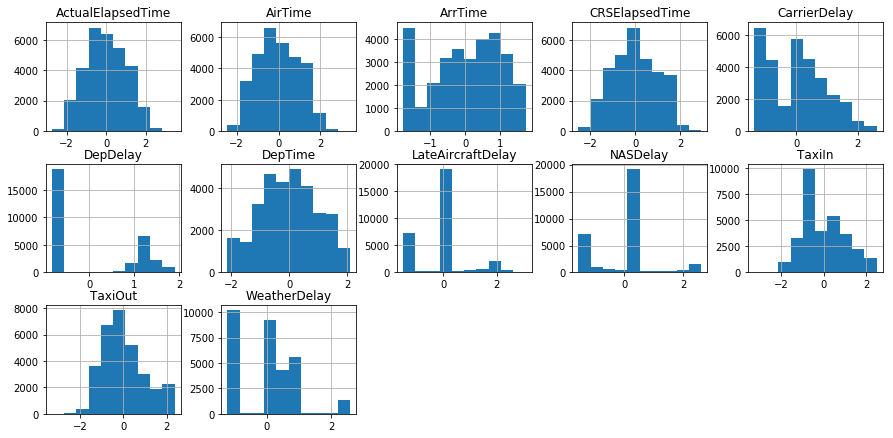

In [128]:
num = data_test_unk.select_dtypes(include=['float64'])
y_unk = num['ArrDelay']
num = num.drop('ArrDelay',axis=1)
cat = data_test_unk.select_dtypes(include=['object'])
scale = MinMaxScaler()
num = pd.DataFrame(scale.fit_transform(num),columns=num.columns)
num.shape
num = pd.DataFrame(power_transform(num,method='yeo-johnson'),columns=num.columns)
num.hist(figsize=(15,15),layout=(6,5))
plt.show()
num.shape,cat.shape
cat = cat.reset_index(drop=True)
num = num.reset_index(drop=True)

In [129]:
le_TailNum = LabelEncoder()
cat['TailNum'] = le_TailNum.fit_transform(cat.TailNum)

In [130]:
# ohe_UniqueCarrier = OneHotEncoder()
# ohe_Origin = OneHotEncoder()
# ohe_Dest = OneHotEncoder()

In [131]:
Xs = ohe_UniqueCarrier.transform(cat.UniqueCarrier.values.reshape(-1,1)).toarray()
Xot = ohe_Origin.transform(cat.Origin.values.reshape(-1,1)).toarray()
Xa = ohe_Dest.transform(cat.Dest.values.reshape(-1,1)).toarray()

In [132]:
pca = PCA(n_components=3)
dfOneHot = pd.DataFrame(Xs, columns = ["UniqueCarrier_"+str(int(i)) for i in range(Xs.shape[1])])
principalComponents = pca.fit_transform(dfOneHot)
principalDf = pd.DataFrame(data = principalComponents, columns = ['UniqueCarrier_1','UniqueCarrier_2','UniqueCarrier_3'])
principalDf.dropna()
cat = pd.concat([cat, principalDf], axis=1)

In [133]:
pca = PCA(n_components=3)
dfOneHot = pd.DataFrame(Xot, columns = ["Origin_"+str(int(i)) for i in range(Xot.shape[1])])
principalComponents = pca.fit_transform(dfOneHot)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Origin_1','Origin_2','Origin_3'])
principalDf = principalDf.dropna()
cat = pd.concat([cat, principalDf], axis=1)

In [134]:
pca = PCA(n_components=3)
dfOneHot = pd.DataFrame(Xa, columns = ["Dest_"+str(int(i)) for i in range(Xa.shape[1])])
principalComponents = pca.fit_transform(dfOneHot)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Dest_1','Dest_2','Dest_3'])
principalDf = principalDf.dropna()
cat = pd.concat([cat, principalDf], axis=1)

In [135]:
cat = cat.drop(['Origin', 'Dest'], axis=1)
del cat['UniqueCarrier']

In [136]:
cat = cat.reset_index(drop=True)
num = num.reset_index(drop=True)
data_test_unk = pd.concat([num,cat],axis=1)
data_test_unk.isnull().sum()

DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
LateAircraftDelay    0
Month                0
DayofMonth           0
DayOfWeek            0
FlightNum            0
TailNum              0
SecurityDelay        0
UniqueCarrier_1      0
UniqueCarrier_2      0
UniqueCarrier_3      0
Origin_1             0
Origin_2             0
Origin_3             0
Dest_1               0
Dest_2               0
Dest_3               0
dtype: int64

In [137]:
data_test_unk.columns

Index(['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'LateAircraftDelay', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightNum', 'TailNum', 'SecurityDelay', 'UniqueCarrier_1',
       'UniqueCarrier_2', 'UniqueCarrier_3', 'Origin_1', 'Origin_2',
       'Origin_3', 'Dest_1', 'Dest_2', 'Dest_3'],
      dtype='object')

In [138]:
# # Create linear regression object
# X_train, X_test, y_train, y_test = train_test_split(data_test_unk, y_unk, test_size=0.25, random_state=20)

# regr = linear_model.Lasso()

# # Train the model using the training sets
# regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(data_test_unk)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_unk, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_unk, y_pred))

Mean squared error: 44128.60
Variance score: 0.14
